### **Spotify Dataset**

The purpose of this project is to build a songs recommendation system, based on the user's music preference.

This dataset contains different features of 600k+ tracks.
1. `tracks.csv`: The audio features of tracks.
2. `artists.csv`: The popularity metrics of artists.

All data collected in this dataset was obtained through Spotify API by Yamac Eren .


The dataset was obtained in [kaggle](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=artists.csv)

#### **Description of the dataset**


- `id`: The Spotify ID for the track.

- `name`:The song's name.

- `popularity`: The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

- `duration_ms`: The track length in milliseconds.

- `explicit`: Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

- `artists`: The artist's name.

- `id_artists`: The Spotify artist ID for the track.

- `release_date`: 

- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- `valence`:A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

For more in-depth information about audio features provided by Spotify: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

### **Data Cleansen and Exploratory Data Analysis**

#### **Cleaning `tracks` data**

Lets import our libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from ast import literal_eval
import json
from typing import Tuple, List

pd.set_option("display.max_columns", None)
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
# sns.set_style("ticks")

In [2]:
tracks_df = pd.read_csv('../spotify_dataset/tracks.csv')
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Every row of this dataframe is a song, with it's own features.

In [3]:
tracks_df.shape

(586672, 20)

The dataset contains 586,672 rows and  20 columns.

In [4]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d')

In [5]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [6]:
tracks_df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

We have a dataset with almost no null values, this is reasonable, as every song as has an unique ID, every song has its own properties.

At this point, notice that both `artists` and `id_artists` are strings, and are not parsed as `List` objects, lets convert them.

In [7]:
def str_to_list(row):
    """convert a string List into a List"""
    row = row.strip("[]").replace("'","").split(", ")
    return row

In [8]:
tracks_df['artists'] = tracks_df['artists'].apply(str_to_list)
tracks_df['id_artists'] = tracks_df['id_artists'].apply(str_to_list)

Now either `artists` and `id_artists` are `List` objects, and we can use it's properties and methods.

As `id_artists` is a list containing only one element, let's get the only element of the list and convert it into a `str`

In [9]:
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: x[0])

#### **Cleaning `artist` data**

In [10]:
artist_df = pd.read_csv('../spotify_dataset/artists.csv')
artist_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [11]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


In [12]:
artist_df['genres'][333]

"['argentine rock', 'rock nacional']"

Notice `genres` column is parsed as a `str`, when it should be a `List`. Lets fix it

In [13]:
artist_df['genres'] = artist_df['genres'].apply(str_to_list)

In [14]:
artist_df['genres'][333]

['argentine rock', 'rock nacional']

Lets rename the columns for avoiding problems when performing a join.

In [15]:
artist_df.rename(columns = {'id':'id_artists', 'genres':'genre_artist', 'name': 'name_artist', 'popularity': 'popularity_artist'}, inplace = True)


#### **Exploratory Data Analysis**

Lets join our dataframes by the artist ID so we have all the columns we need.

In [16]:
complete_data = pd.merge(tracks_df, artist_df, how='left', on='id_artists')
complete_data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genre_artist,name_artist,popularity_artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,[Uli],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,91.0,[],Uli,4.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,[Fernando Pessoa],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,3.0,[],Fernando Pessoa,0.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,[Ignacio Corsini],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3528.0,"[tango, vintage tango]",Ignacio Corsini,23.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,[Ignacio Corsini],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,3528.0,"[tango, vintage tango]",Ignacio Corsini,23.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,[Dick Haymes],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,11327.0,"[adult standards, big band, easy listening, lo...",Dick Haymes,35.0


In [17]:
complete_data['duration_mins'] = complete_data['duration_ms'] / 60000

In [18]:
complete_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers',
       'genre_artist', 'name_artist', 'popularity_artist', 'duration_mins'],
      dtype='object')

In [19]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586672 entries, 0 to 586671
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 586672 non-null  object        
 1   name               586601 non-null  object        
 2   popularity         586672 non-null  int64         
 3   duration_ms        586672 non-null  int64         
 4   explicit           586672 non-null  int64         
 5   artists            586672 non-null  object        
 6   id_artists         586672 non-null  object        
 7   release_date       586672 non-null  datetime64[ns]
 8   danceability       586672 non-null  float64       
 9   energy             586672 non-null  float64       
 10  key                586672 non-null  int64         
 11  loudness           586672 non-null  float64       
 12  mode               586672 non-null  int64         
 13  speechiness        586672 non-null  float64 

In [20]:
(complete_data.isnull().sum()/complete_data.shape[0] * 100).to_frame(name='percentaje_of_nulls')


,percentaje_of_nulls
id,0.000000
name,0.012102
popularity,0.000000
duration_ms,0.000000
explicit,0.000000
artists,0.000000
id_artists,0.000000
release_date,0.000000
danceability,0.000000
energy,0.000000


In [21]:
complete_data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artist,duration_mins
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,5.748110e+05,574812.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,1.105901e+06,50.680826,3.834186
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,3.915702e+06,19.959986,2.108768
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.055733
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,1.237700e+04,38.000000,2.918217
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,9.709600e+04,52.000000,3.581550
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,6.130600e+05,65.000000,4.397783
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,7.890023e+07,100.000000,93.686967


In [22]:
complete_data[complete_data.columns.difference(['genre_artist', 'artists'])].duplicated().sum()

0

We have no duplicated data

#### Let's deep dive into  the dataset distribution

In [23]:
complete_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers',
       'genre_artist', 'name_artist', 'popularity_artist', 'duration_mins'],
      dtype='object')

#### Helper Functions

In [24]:
def describe_helper(series: pd.Series) -> Tuple:
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

In [25]:
def summary_statistic_plot(df: pd.DataFrame, column: str, **kwargs):
    """
    Function to plot  a histogram, a boxplot and the descriptive statistics into one single plot
    
    Parameters:
    ----------
        df : pd.DataFrame
        column: str
            column that has a numeric data type

    """
    sns.set(style="darkgrid")
    
    splits = str(df[column].describe()).split()
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.histplot(x = column, data = df, ax=ax_hist, **kwargs)
    sns.boxplot(x = column, data=df, ax=ax_box)
    
    plt.figtext(.95, .20, describe_helper(df[column])[0], {'multialignment':'left'})
    plt.figtext(1.05, .20, describe_helper(df[column])[1], {'multialignment':'right'})
    plt.show()

#### Popularity Analysis

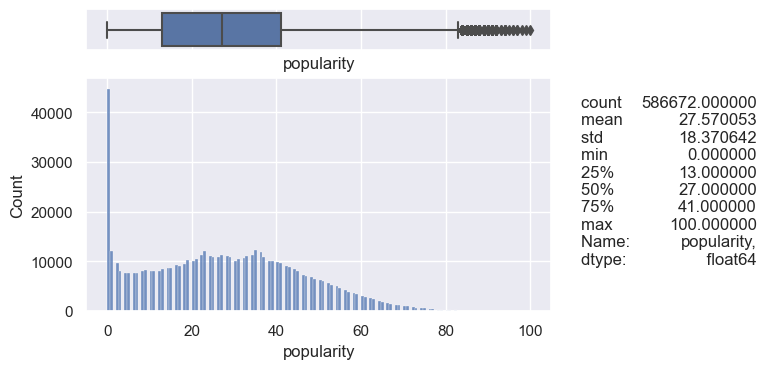

In [26]:
summary_statistic_plot(complete_data, 'popularity')

- `popularity`: The popularity of the artist. The value will be between 0 and 100, with 100 being the most popular. The artist's popularity is calculated from the popularity of all the artist's tracks.

We can see there are more than 40,000 artists in the dataset that have the lowest popularity score. The mean is 27.5 and the median 27. 

#### Minute duration Analysis

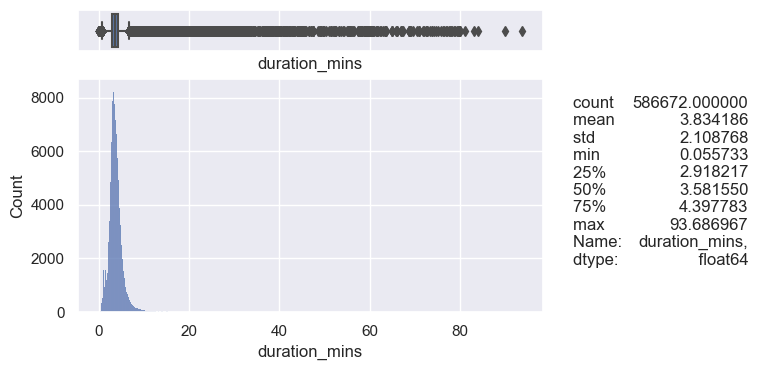

In [27]:
summary_statistic_plot(complete_data, 'duration_mins')

- Notice the datset has a large range, as the minimum song observed it 0.05 mins and the maximum value 93.68 minutes long. That is why our dataset histogram has a large range
- While our 3rd Quartile is ~4.39 mins. 

Lets take a look to the song with a duration larger then 5 mins

In [28]:
large_duration = complete_data[complete_data['duration_mins'] > 5]
large_duration['duration_mins'].describe()

count    82473.000000
mean         6.876843
std          3.959395
min          5.000017
25%          5.330667
50%          5.853367
75%          6.976217
max         93.686967
Name: duration_mins, dtype: float64

We have 82473 songs with a duration larger than 5 Mins!

#### Explicit Songs Analysis

- `explicit`: Whether or not the track has explicit lyrics ( 1 := yes it does; 1 := no it does not OR unknown).

In [29]:
complete_data[['explicit']].value_counts() / complete_data['explicit'].count()


explicit
0           0.955914
1           0.044086
dtype: float64

- In our dataset, we have ~ 95% of Non explicit songs, while < 5% are explicit

#### Release Date Analysis

In [30]:
complete_data[['release_date']].describe(datetime_is_numeric=True)

,release_date
count,586672
mean,1988-11-15 11:23:25.361769344
min,1900-01-01 00:00:00
25%,1974-01-01 00:00:00
50%,1992-07-31 00:00:00
75%,2007-09-21 00:00:00
max,2021-04-16 00:00:00


#### Danceability feature Analysis

- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

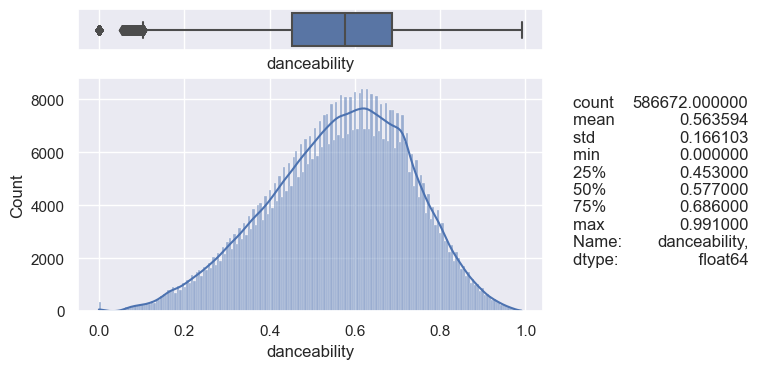

In [31]:
summary_statistic_plot(complete_data, 'danceability', kde = True)

Looks like most of our sample is quite danceable!

In [32]:
danceability_IQR = complete_data['danceability'].quantile(.75) - complete_data['danceability'].quantile(.25)
rank = complete_data['danceability'].max() - complete_data['danceability'].min()
danceability_IQR, rank

(0.23300000000000004, 0.991)

Note that Q2 is 0.45 and Q3 is 0.68, most of the songs in this dataset are danceable. The IQR is 0.233 

#### Energy feature Analysis

- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

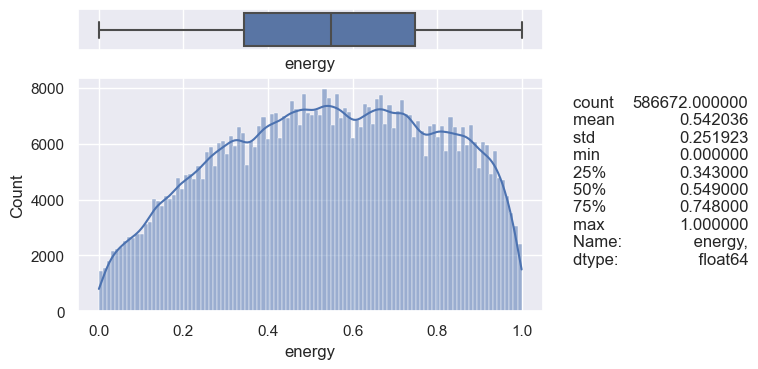

In [33]:
summary_statistic_plot(complete_data, 'energy', kde = True)

This distribution is interesting! Note that the energy feature looks like a downward parabola!

#### Key feature Analysis

- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

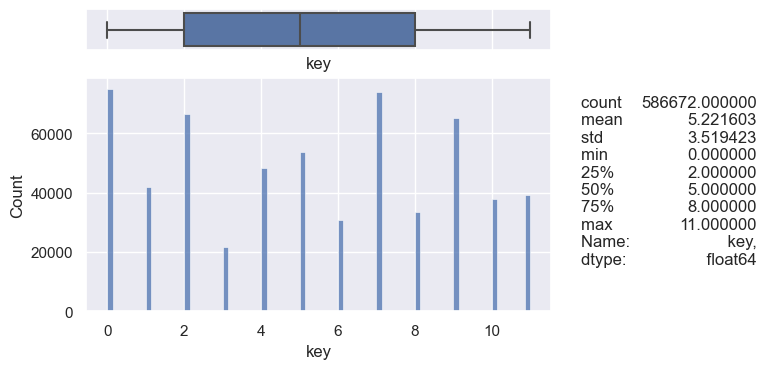

In [34]:
summary_statistic_plot(complete_data, 'key')

Note that the most used keys in our sample are: 0 = C, 2 D, 7 = G and 9 = A

#### Key feature Analysis

- `loudness`: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

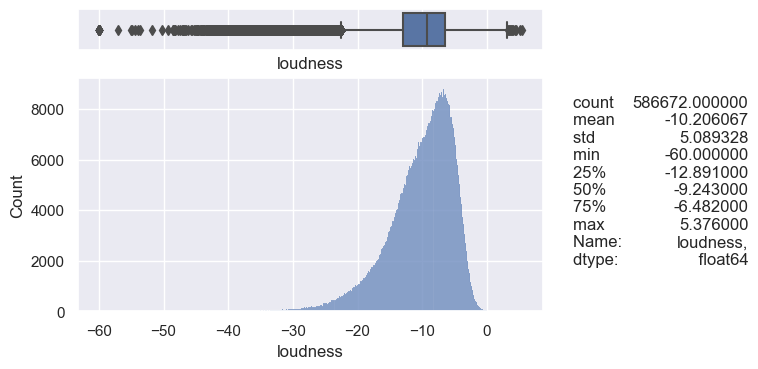

In [35]:
summary_statistic_plot(complete_data, 'loudness')

This distribution is quite left skewed. Also in the boxplot we can note many outliers


#### Mode feature Analysis

- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [36]:
complete_data['mode'].describe()

count    586672.000000
mean          0.658797
std           0.474114
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: mode, dtype: float64

In [37]:
complete_data['mode'].value_counts() / complete_data.shape[0]

1    0.658797
0    0.341203
Name: mode, dtype: float64

65% of our sample songs are Major scale, while 35% are minor.

#### Speechiness feature Analysis

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

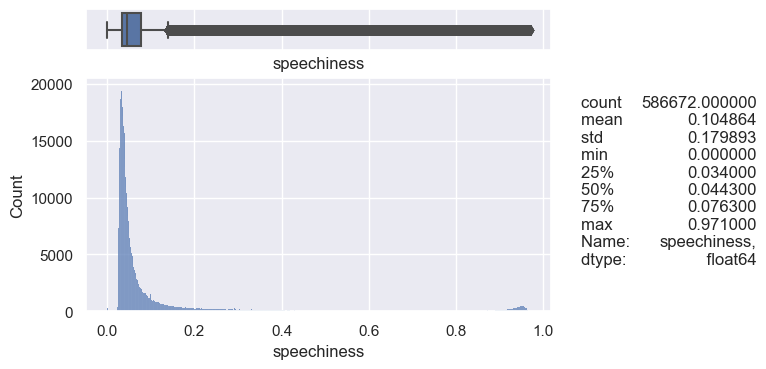

In [38]:
summary_statistic_plot(complete_data, 'speechiness')

Wow! Our dataset is mostly musical-feature audio. Notice there are few tracks that have a high `speechiness`  value. Lets look at them

In [39]:
complete_data[complete_data['speechiness'] > 0.66]['speechiness'].describe()

count    22598.000000
mean         0.909589
std          0.064494
min          0.661000
25%          0.898000
50%          0.935000
75%          0.950000
max          0.971000
Name: speechiness, dtype: float64

In [40]:
non_spoken_tracks = complete_data[complete_data['speechiness'] > 0.66][['speechiness', 'genre_artist']]
non_spoken_tracks['speechiness'].describe()

count    22598.000000
mean         0.909589
std          0.064494
min          0.661000
25%          0.898000
50%          0.935000
75%          0.950000
max          0.971000
Name: speechiness, dtype: float64

There are 22598 tracks are probably made entirely of spoken words.

#### Acousticness feature Analysis

-  `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.



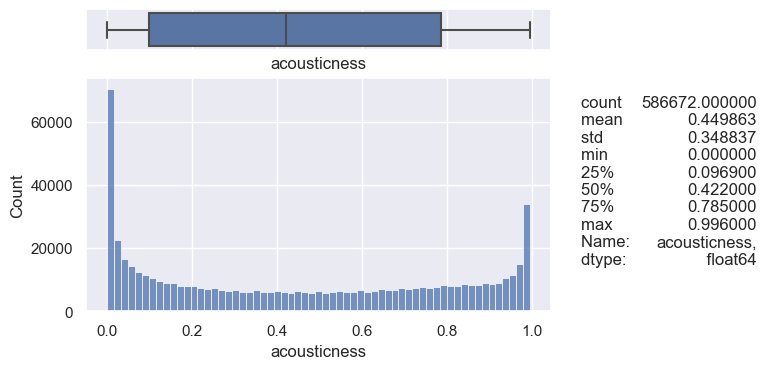

In [41]:
summary_statistic_plot(complete_data, 'acousticness')

The distribution looks quite uniform between 0.09 and 0.9, white we have heavy tails en the extreme values!

There are manys songs that are un-acoustic!

#### Instrumentalness feature Analysis

- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

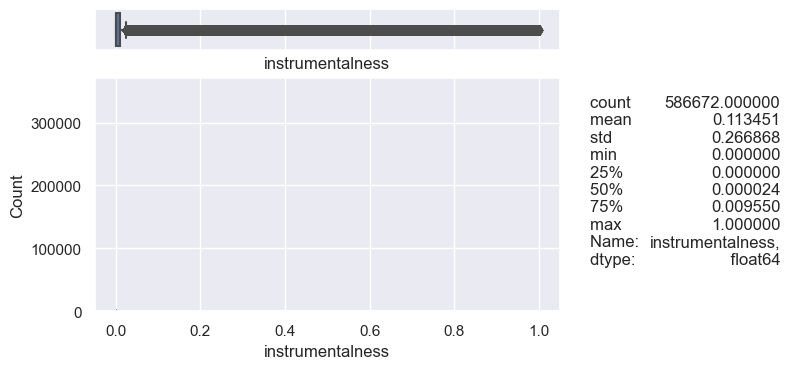

In [42]:
summary_statistic_plot(complete_data, 'instrumentalness')

This is important! most of the distribution of this variable is concentrated in values between 0 and 0.009. We have to deep diver to understand this phenomenum

#### liveness feature Analysis

- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

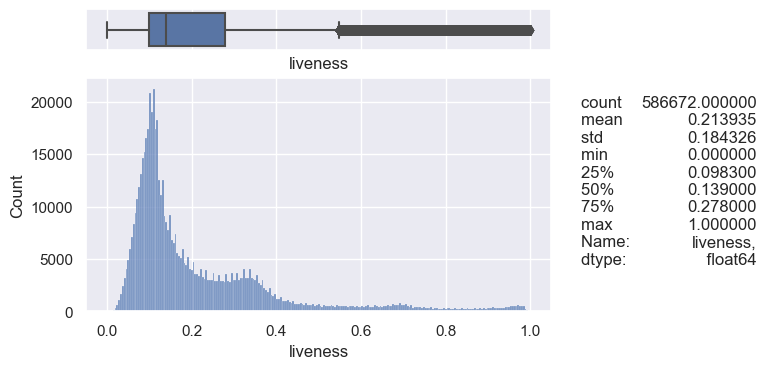

In [43]:
summary_statistic_plot(complete_data, 'liveness')

Looks like most of our tracks were not perfomanced live.

In [44]:
complete_data[complete_data['liveness'] > 0.8]['liveness'].describe()

count    14312.000000
mean         0.909152
std          0.056516
min          0.801000
25%          0.861000
50%          0.918000
75%          0.960000
max          1.000000
Name: liveness, dtype: float64

There are 14312 that have a `liveness` value > 8, provides strong likelihood that the track is live.

#### Valence feature Analysis

-  `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

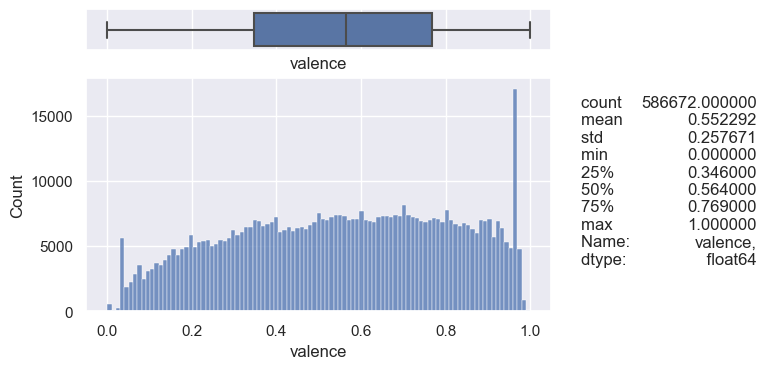

In [45]:
summary_statistic_plot(complete_data, 'valence')

There is a peak ot the valence feature, this is quite strange, as the entire variable is quite uniform across the possible values.
- Looks like there are few more tracks with a positive sound, than a negative one.

#### Tempo feature Analysis

- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

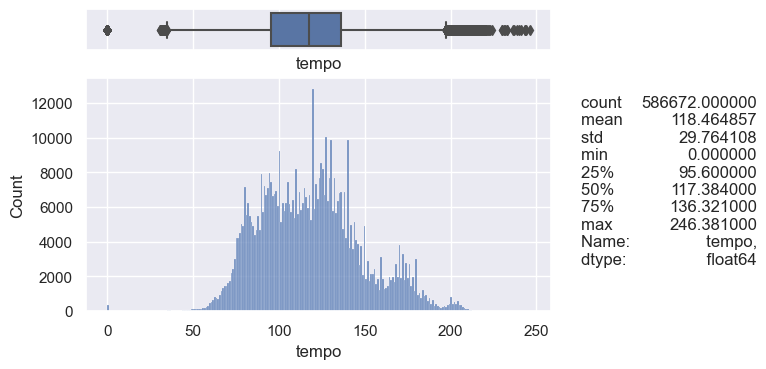

In [46]:
summary_statistic_plot(complete_data, 'tempo')

There are some pikes on the distribution, and many values that may be outliers!
- As we know, different genres have different tempos, lets look at yhe distribution of tempo per genres:

In [47]:
complete_data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers',
       'genre_artist', 'name_artist', 'popularity_artist', 'duration_mins'],
      dtype='object')

In [48]:
complete_data[['genre_artist']].explode('genre_artist').value_counts().nlargest(100)

genre_artist   
                   49168
rock               31819
adult standards    25755
classic rock       23657
mellow gold        19224
                   ...  
j-rock              4204
country             4193
turkish folk        4159
suomi rock          4068
trance              4068
Length: 100, dtype: int64

#### Time Signature feature Analysis

- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

In [49]:
complete_data['time_signature'] = complete_data['time_signature'].astype('category')
complete_data['time_signature'].value_counts() / complete_data.shape[0]


4    0.858756
3    0.109981
5    0.019432
1    0.011257
0    0.000574
Name: time_signature, dtype: float64

We have:
- 85.8% of tracks in 4/4 signature
- 10.9% of tracks in 3/4 signature
- 1.9% of tracks in 5/4 signature
- 1.6% of tracks in with a rara signature, this may be untrusty data

#### Explore Linear relationship between variables

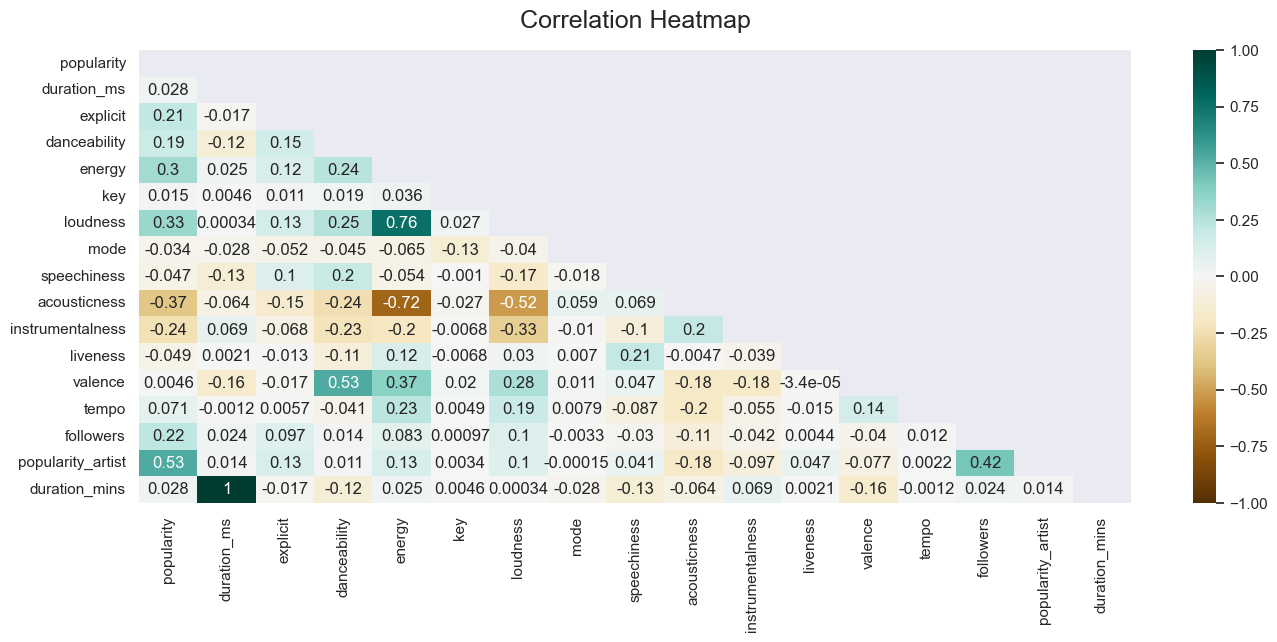

In [53]:
corr = complete_data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [55]:
numerical_columns = complete_data.select_dtypes(include=np.number).columns
numerical_columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'followers',
       'popularity_artist', 'duration_mins'],
      dtype='object')

In [56]:
# for i in numerical_columns:
    

popularity
duration_ms
explicit
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
followers
popularity_artist
duration_mins


<module 'seaborn' from '/Users/luis.morales/opt/anaconda3/lib/python3.9/site-packages/seaborn/__init__.py'>

Here are many interesting things!

First,lets take a look into the variables with positive correlation:

